In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV, LassoCV

import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

# AllCandidates(2022)

In [ ]:
cand = pd.read_csv("/candidate_summary_2022.csv")
cand.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H2CA01185/?...,"GODFREY, MARCUS SCOTT",H2CA01185,H,CA,1.0,LIB,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,https://www.fec.gov/data/candidate/S2MO00502/?...,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,OPEN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,https://www.fec.gov/data/candidate/S2FL00532/?...,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,https://www.fec.gov/data/candidate/H2AZ04200/?...,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,https://www.fec.gov/data/candidate/S2WI00367/?...,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
print(cand.columns.tolist())

['Link_Image', 'Cand_Name', 'Cand_Id', 'Cand_Office', 'Cand_Office_St', 'Cand_Office_Dist', 'Cand_Party_Affiliation', 'Cand_Incumbent_Challenger_Open_Seat', 'Total_Receipt', 'Total_Disbursement', 'Cash_On_Hand_COP', 'Debt_Owed_By_Committee', 'Coverage_End_Date', 'Cand_Street_1', 'Cand_Street_2', 'Cand_City', 'Cand_State', 'Cand_Zip', 'Individual_Itemized_Contribution', 'Individual_Unitemized_Contribution', 'Individual_Contribution', 'Other_Committee_Contribution', 'Party_Committee_Contribution', 'Cand_Contribution', 'Total_Contribution', 'Transfer_From_Other_Auth_Committee', 'Cand_Loan', 'Other_Loan', 'Total_Loan', 'Offsets_To_Operating_Expenditure', 'Offsets_To_Fundraising', 'Offsets_To_Leagal_Accounting', 'Other_Receipts', 'Operating_Expenditure', 'Exempt_Legal_Accounting_Disbursement', 'Fundraising_Disbursement', 'Transfer_To_Other_Auth_Committee', 'Cand_Loan_Repayment', 'Other_Loan_Repayment', 'Total_Loan_Repayment', 'Individual_Refund', 'Party_Committee_Refund', 'Other_Committee_R

# House and Senate results (2022)

In [ ]:
senate_results = pd.read_csv("/7. US Senate Results by State-Table 1.csv")
senate_results.head()

,1,STATE ABBREVIATION,STATE,DISTRICT,FEC ID,(I) INCUMBENT INDICATOR,CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,2ND ROUND RCV VOTES,2ND ROUND RCV %,3RD ROUND RCV VOTES,3RD ROUND RCV %,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,AL,Alabama,S,S2AL00145,NaN,Katie,Britt,"Britt, Katie",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,AL,Alabama,S,S8AL00381,NaN,Mo,Brooks,"Brooks, Mo",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,AL,Alabama,S,S2AL00202,NaN,Mike,Durant,"Durant, Mike",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,AL,Alabama,S,S2AL00160,NaN,Jake,Schafer,"Schafer, Jake",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(senate_results.columns.tolist())

['1', 'STATE ABBREVIATION', 'STATE', 'DISTRICT', 'FEC ID', '(I) INCUMBENT INDICATOR', 'CANDIDATE NAME (First)', 'CANDIDATE NAME (Last)', 'CANDIDATE NAME', 'TOTAL VOTES', 'PARTY', 'PRIMARY VOTES', 'PRIMARY %', 'RUNOFF VOTES', 'RUNOFF %', 'GENERAL VOTES ', 'GENERAL %', 'GE RUNOFF ELECTION VOTES (GA)', 'GE RUNOFF ELECTION % (GA)', 'COMBINED GE PARTY TOTALS (when applicable)', 'COMBINED GE PARTY % (when applicable)', 'PE WINNER INDICATOR', 'GE WINNER INDICATOR', 'FOOTNOTES', '1ST ROUND RCV VOTES', '1ST ROUND RCV %', '2ND ROUND RCV VOTES', '2ND ROUND RCV %', '3RD ROUND RCV VOTES', '3RD ROUND RCV %', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35']


In [ ]:
house_results = pd.read_csv("/8. US House Results by State-Table 1.csv")
house_results.head()

,1,STATE ABBREVIATION,STATE,DISTRICT,FEC ID,(I) INCUMBENT INDICATOR,CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,COMBINED GE PARTY % (when applicable),PE WINNER INDICATOR,GE WINNER INDICATOR,FOOTNOTES,1ST ROUND RCV VOTES,1ST ROUND RCV %,2ND ROUND RCV VOTES,2ND ROUND RCV %,3RD ROUND RCV VOTES,3RD ROUND RCV %
0,2,AL,Alabama,NaN,NaN,NaN,NaN,NaN,DISTRICT 1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,AL,Alabama,01,H0AL01055,(I),Jerry,Carl,"Carl, Jerry",NaN,...,NaN,W,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,AL,Alabama,01,H2AL01218,NaN,Alexander M.,Remrey,"Remrey, Alexander M.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,AL,Alabama,01,NaN,NaN,NaN,Scattered,Scattered,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,AL,Alabama,01,NaN,NaN,NaN,NaN,NaN,District Votes:,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(house_results.columns.tolist())

['1', 'STATE ABBREVIATION', 'STATE', 'DISTRICT', 'FEC ID', '(I) INCUMBENT INDICATOR', 'CANDIDATE NAME (First)', 'CANDIDATE NAME (Last)', 'CANDIDATE NAME', 'TOTAL VOTES', 'PARTY', 'PRIMARY VOTES', 'PRIMARY %', 'RUNOFF VOTES', 'RUNOFF %', 'GENERAL VOTES ', 'GENERAL %', 'GE RUNOFF ELECTION VOTES (when applicable)', 'GE RUNOFF ELECTION % (when applicable)', 'COMBINED GE PARTY TOTALS (when applicable)', 'COMBINED GE PARTY % (when applicable)', 'PE WINNER INDICATOR', 'GE WINNER INDICATOR', 'FOOTNOTES', '1ST ROUND RCV VOTES', '1ST ROUND RCV %', '2ND ROUND RCV VOTES', '2ND ROUND RCV %', '3RD ROUND RCV VOTES', '3RD ROUND RCV %']


# RQ2: Estimating the Causal Effect of Campaign Spending on Electoral Outcomes

In [ ]:
senate_results["race_id"] = senate_results["STATE"].str.upper() + "_S"
house_results["race_id"] = house_results["STATE"].str.upper() + "_H_" + house_results["DISTRICT"].astype(str)

senate_results.rename(columns={"FEC ID": "cand_id"}, inplace=True)
house_results.rename(columns={"FEC ID": "cand_id"}, inplace=True)

results = pd.concat([senate_results, house_results], ignore_index=True)

results["vote_percent"] = results["GENERAL %"].str.replace("%", "").astype(float)

results_top2 = (results.sort_values(["race_id", "vote_percent"], ascending=[True, False]).groupby("race_id").head(2).copy())

In [ ]:
race_counts = results_top2["race_id"].value_counts()
race_counts.head(10)

,count
race_id,
WEST VIRGINIA_H_02,2
WEST VIRGINIA_H_01,2
WASHINGTON_S,2
WASHINGTON_H_nan,2
WASHINGTON_H_10,2
WASHINGTON_H_09,2
WASHINGTON_H_08,2
WASHINGTON_H_07,2
WASHINGTON_H_06,2


In [ ]:
results_top2.head(10)

,1,STATE ABBREVIATION,STATE,DISTRICT,cand_id,(I) INCUMBENT INDICATOR,CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,race_id,GE RUNOFF ELECTION VOTES (when applicable),GE RUNOFF ELECTION % (when applicable),vote_percent
658,3,AL,Alabama,01,H0AL01055,(I),Jerry,Carl,"Carl, Jerry",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_01,NaN,NaN,83.61
659,4,AL,Alabama,01,H2AL01218,NaN,Alexander M.,Remrey,"Remrey, Alexander M.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_01,NaN,NaN,15.68
663,8,AL,Alabama,02,H8AL02171,(I),Barry,Moore,"Moore, Barry",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_02,NaN,NaN,69.09
664,9,AL,Alabama,02,H0AL02202,NaN,Phyllis,Harvey-Hall,"Harvey-Hall, Phyllis",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_02,NaN,NaN,29.16
671,16,AL,Alabama,03,H2AL03032,(I),Mike,Rogers,"Rogers, Mike",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_03,NaN,NaN,71.22
674,19,AL,Alabama,03,H2AL03131,NaN,Lin,Veasey,"Veasey, Lin",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_03,NaN,NaN,25.14
680,25,AL,Alabama,04,H6AL04098,(I),Robert,Alderholt,"Alderholt, Robert",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_04,NaN,NaN,84.12
681,26,AL,Alabama,04,H8AL04086,NaN,Rick,Neighbors,"Neighbors, Rick",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_04,NaN,NaN,13.64
688,33,AL,Alabama,05,H2AL05102,NaN,Dale,Strong,"Strong, Dale",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_05,NaN,NaN,67.09
695,40,AL,Alabama,05,H2AL05177,NaN,Kathy,Warner-Stanton,"Warner-Stanton, Kathy",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ALABAMA_H_05,NaN,NaN,29.55


In [ ]:
print(results_top2.columns.tolist())

['1', 'STATE ABBREVIATION', 'STATE', 'DISTRICT', 'cand_id', '(I) INCUMBENT INDICATOR', 'CANDIDATE NAME (First)', 'CANDIDATE NAME (Last)', 'CANDIDATE NAME', 'TOTAL VOTES', 'PARTY', 'PRIMARY VOTES', 'PRIMARY %', 'RUNOFF VOTES', 'RUNOFF %', 'GENERAL VOTES ', 'GENERAL %', 'GE RUNOFF ELECTION VOTES (GA)', 'GE RUNOFF ELECTION % (GA)', 'COMBINED GE PARTY TOTALS (when applicable)', 'COMBINED GE PARTY % (when applicable)', 'PE WINNER INDICATOR', 'GE WINNER INDICATOR', 'FOOTNOTES', '1ST ROUND RCV VOTES', '1ST ROUND RCV %', '2ND ROUND RCV VOTES', '2ND ROUND RCV %', '3RD ROUND RCV VOTES', '3RD ROUND RCV %', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'race_id', 'GE RUNOFF ELECTION VOTES (when applicable)', 'GE RUNOFF ELECTION % (when applicable)', 'vote_percent']


In [ ]:
cand.columns = cand.columns.str.lower()
results_top2.columns = results_top2.columns.str.lower()

cand["cand_id"] = cand["cand_id"].str.upper().str.strip()
results_top2["cand_id"] = results_top2["cand_id"].str.upper().str.strip()

keep_cols = ["cand_id",
             "cand_party_affiliation",
             "cand_incumbent_challenger_open_seat",
             "cand_office",
             "cand_office_st",
             "cand_office_dist",
             "total_receipt",
             "total_disbursement",
             "operating_expenditure",
             "fundraising_disbursement",
             "net_operating_expenditure",
             "individual_contribution",
             "cand_contribution",
             "total_contribution"
]

merged_df = results_top2.merge(cand[keep_cols],on="cand_id",how="left")

final_cols = [
    "race_id",
    "candidate name",
    "vote_percent",
    "ge winner indicator",
    "cand_party_affiliation",
    "cand_incumbent_challenger_open_seat",
    "cand_office",
    "cand_office_st",
    "cand_office_dist",
    "total_receipt",
    "total_disbursement",
    "operating_expenditure",
    "fundraising_disbursement",
    "net_operating_expenditure",
    "individual_contribution",
    "cand_contribution",
    "total_contribution"
]

final_df = merged_df[final_cols].copy()

In [ ]:
final_df.head(30)

,race_id,candidate name,vote_percent,ge winner indicator,cand_party_affiliation,cand_incumbent_challenger_open_seat,cand_office,cand_office_st,cand_office_dist,total_receipt,total_disbursement,operating_expenditure,fundraising_disbursement,net_operating_expenditure,individual_contribution,cand_contribution,total_contribution
0,ALABAMA_H_01,"Carl, Jerry",83.61,W,REP,INCUMBENT,H,AL,1.0,1313718.57,971793.34,790168.20,0.0,789658.20,532388.69,0.00,1031888.69
1,ALABAMA_H_01,"Remrey, Alexander M.",15.68,NaN,LIB,CHALLENGER,H,AL,1.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,ALABAMA_H_02,"Moore, Barry",69.09,W,REP,INCUMBENT,H,AL,2.0,891776.46,430418.03,416159.91,0.0,408321.12,524421.35,0.00,867810.60
3,ALABAMA_H_02,"Harvey-Hall, Phyllis",29.16,NaN,DEM,CHALLENGER,H,AL,2.0,60440.24,60219.66,59631.54,0.0,59631.54,48936.06,0.00,52617.24
4,ALABAMA_H_03,"Rogers, Mike",71.22,W,REP,INCUMBENT,H,AL,3.0,2262995.22,1737893.91,1590670.91,0.0,1552039.98,1170064.81,0.00,2202324.54
5,ALABAMA_H_03,"Veasey, Lin",25.14,NaN,DEM,CHALLENGER,H,AL,3.0,9968.00,13237.70,13237.70,0.0,17546.33,4413.00,0.00,9968.00
6,ALABAMA_H_04,"Alderholt, Robert",84.12,W,REP,INCUMBENT,H,AL,4.0,1540807.20,1028366.36,886408.22,0.0,886303.22,845700.98,0.00,1530384.48
7,ALABAMA_H_04,"Neighbors, Rick",13.64,NaN,DEM,CHALLENGER,H,AL,4.0,22648.30,23619.51,23619.51,0.0,23619.51,22498.30,0.00,22648.30
8,ALABAMA_H_05,"Strong, Dale",67.09,W,REP,CHALLENGER,H,AL,5.0,1994353.59,1975308.27,1951408.27,0.0,1950824.59,1393769.91,0.00,1753769.91
9,ALABAMA_H_05,"Warner-Stanton, Kathy",29.55,NaN,DEM,OPEN,H,AL,5.0,85150.00,84706.25,84706.25,0.0,84706.25,5150.00,0.00,5150.00


In [ ]:
finance_cols = [
    "total_receipt", "total_disbursement", "operating_expenditure",
    "fundraising_disbursement", "net_operating_expenditure",
    "individual_contribution", "cand_contribution", "total_contribution"
]

missing_finance = final_df[finance_cols].isnull().all(axis=1)

bad_race_ids = final_df.loc[missing_finance, "race_id"].unique()

final_df[final_df["race_id"].isin(bad_race_ids)]

,race_id,candidate name,vote_percent,ge winner indicator,cand_party_affiliation,cand_incumbent_challenger_open_seat,cand_office,cand_office_st,cand_office_dist,total_receipt,total_disbursement,operating_expenditure,fundraising_disbursement,net_operating_expenditure,individual_contribution,cand_contribution,total_contribution
14,ALABAMA_H_H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,ALABAMA_H_nan,DISTRICT 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,ALABAMA_H_nan,DISTRICT 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,ALASKA_H_H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,ALASKA_H_nan,AT LARGE DISTRICT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,WISCONSIN_H_H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,WISCONSIN_H_nan,DISTRICT 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,WISCONSIN_H_nan,DISTRICT 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,WYOMING_H_H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_race_ids = final_df.loc[final_df[finance_cols].isnull().all(axis=1), "race_id"].unique()

In [ ]:
final_df = final_df[~final_df["race_id"].isin(null_race_ids)].copy()
final_df.head(50)

,race_id,candidate name,vote_percent,ge winner indicator,cand_party_affiliation,cand_incumbent_challenger_open_seat,cand_office,cand_office_st,cand_office_dist,total_receipt,total_disbursement,operating_expenditure,fundraising_disbursement,net_operating_expenditure,individual_contribution,cand_contribution,total_contribution
0,ALABAMA_H_01,"Carl, Jerry",83.61,W,REP,INCUMBENT,H,AL,1.0,1313718.57,971793.34,790168.20,0.0,789658.20,532388.69,0.00,1031888.69
1,ALABAMA_H_01,"Remrey, Alexander M.",15.68,NaN,LIB,CHALLENGER,H,AL,1.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,ALABAMA_H_02,"Moore, Barry",69.09,W,REP,INCUMBENT,H,AL,2.0,891776.46,430418.03,416159.91,0.0,408321.12,524421.35,0.00,867810.60
3,ALABAMA_H_02,"Harvey-Hall, Phyllis",29.16,NaN,DEM,CHALLENGER,H,AL,2.0,60440.24,60219.66,59631.54,0.0,59631.54,48936.06,0.00,52617.24
4,ALABAMA_H_03,"Rogers, Mike",71.22,W,REP,INCUMBENT,H,AL,3.0,2262995.22,1737893.91,1590670.91,0.0,1552039.98,1170064.81,0.00,2202324.54
5,ALABAMA_H_03,"Veasey, Lin",25.14,NaN,DEM,CHALLENGER,H,AL,3.0,9968.00,13237.70,13237.70,0.0,17546.33,4413.00,0.00,9968.00
6,ALABAMA_H_04,"Alderholt, Robert",84.12,W,REP,INCUMBENT,H,AL,4.0,1540807.20,1028366.36,886408.22,0.0,886303.22,845700.98,0.00,1530384.48
7,ALABAMA_H_04,"Neighbors, Rick",13.64,NaN,DEM,CHALLENGER,H,AL,4.0,22648.30,23619.51,23619.51,0.0,23619.51,22498.30,0.00,22648.30
8,ALABAMA_H_05,"Strong, Dale",67.09,W,REP,CHALLENGER,H,AL,5.0,1994353.59,1975308.27,1951408.27,0.0,1950824.59,1393769.91,0.00,1753769.91
9,ALABAMA_H_05,"Warner-Stanton, Kathy",29.55,NaN,DEM,OPEN,H,AL,5.0,85150.00,84706.25,84706.25,0.0,84706.25,5150.00,0.00,5150.00


In [ ]:
len(final_df)

902

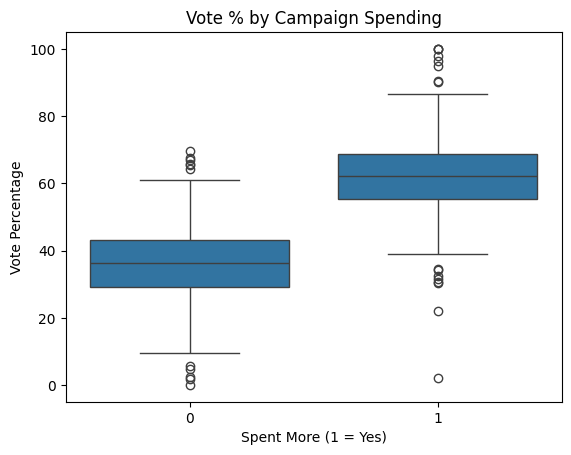

In [ ]:
sns.boxplot(x='treatment', y='vote_percent', data=final_df)
plt.title('Vote % by Campaign Spending')
plt.xlabel('Spent More (1 = Yes)')
plt.ylabel('Vote Percentage')
plt.show()

# Defining our Treatment and Outcome Variables

Our treatment variable is a binary flag indicating whether a candidate spent the most in their race. We assign a 1 to the candidate with the highest total disbursement, stored in the total_dsibursement column, within each race_id, and 0 otherwise.

Our outcome variable is the candidate’s vote percentage, stored in the vote_percent column. This represents the share of the vote each candidate received in their respective general election.

In this way, we are directly comparing the top spender in each race to everyone else, allowing us to evaluate whether spending more money is associated with receiving a higher percentage of the vote.

In [ ]:
final_df['treatment'] = final_df.groupby('race_id')['total_disbursement'].transform(lambda x: x == x.max()).astype(int)

# Identifying Potential Confounders

In thinking through potential confounding factors, we focused on variables that could influence both our treatment variable (treatment, defined as the candidate who spent the most in each race) and our outcome variable (vote_percent). We hypothesized that both party affiliation and incumbency status might serve as confounders since they can plausibly affect how much a candidate spends and how well they perform in the election. To test this visually, we used Seaborn’s pairplot to examine correlations between spending, vote percentage, and the potential confounders across three separate plots.

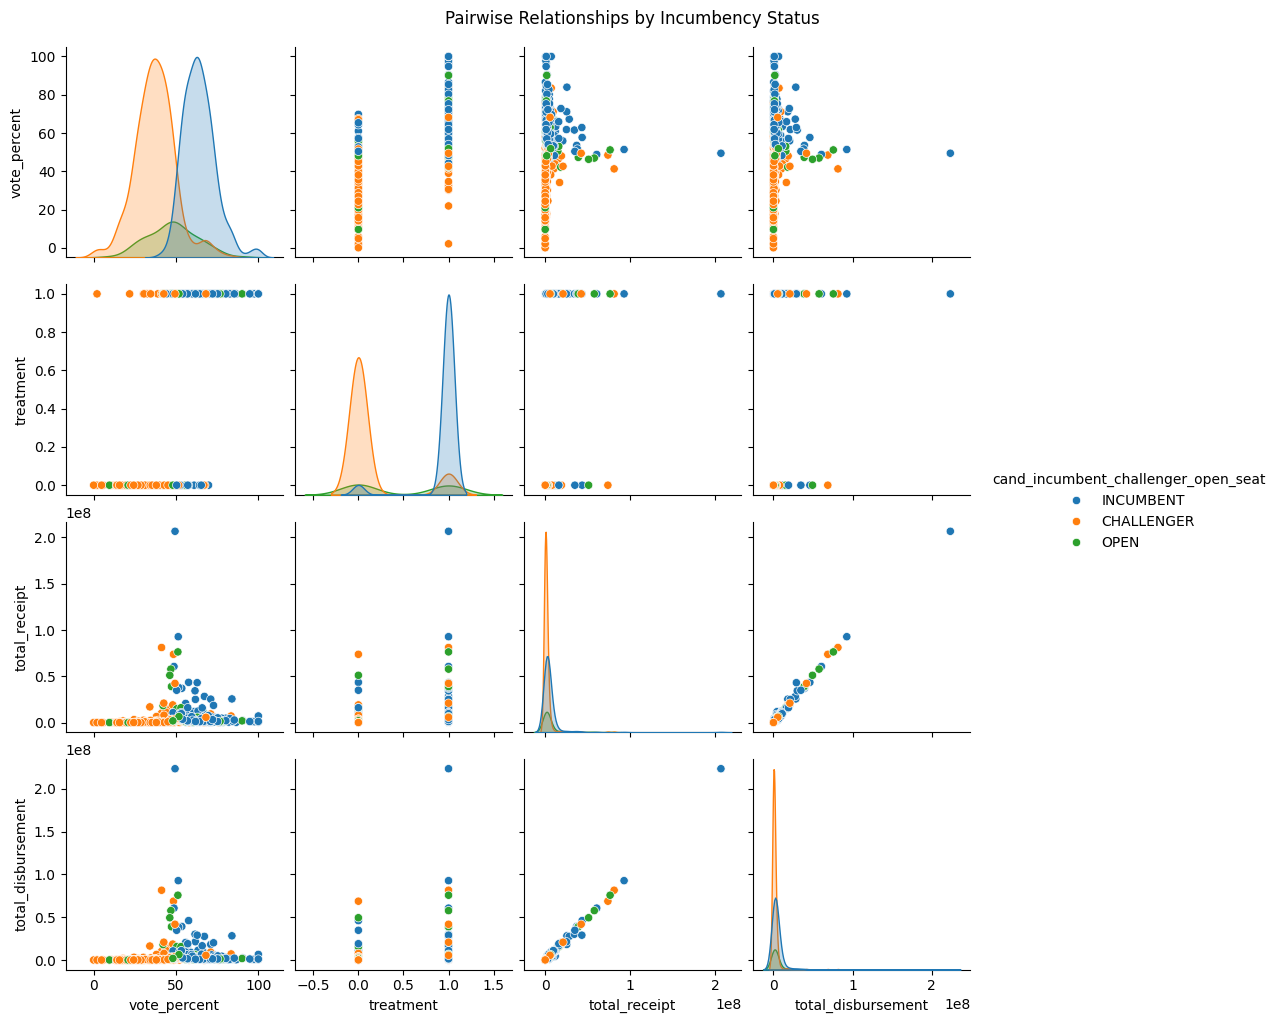

In [ ]:
cols_to_plot = ['vote_percent', 'treatment', 'total_receipt', 'total_disbursement','cand_incumbent_challenger_open_seat']

pair_df = final_df[cols_to_plot].dropna()

sns.pairplot(pair_df, hue='cand_incumbent_challenger_open_seat')

plt.suptitle("Pairwise Relationships by Incumbency Status", y=1.02)
plt.show()

This plot shows how the relationship between vote percent, treatment, and spending variables varies based on whether a candidate is an incumbent, challenger, or running in an open seat. The distributions indicate that incumbents generally receive more votes and are more likely to be in the treatment group (spend the most). That suggests incumbency is potentially correlated with both treatment and outcome, making it a likely confounder.

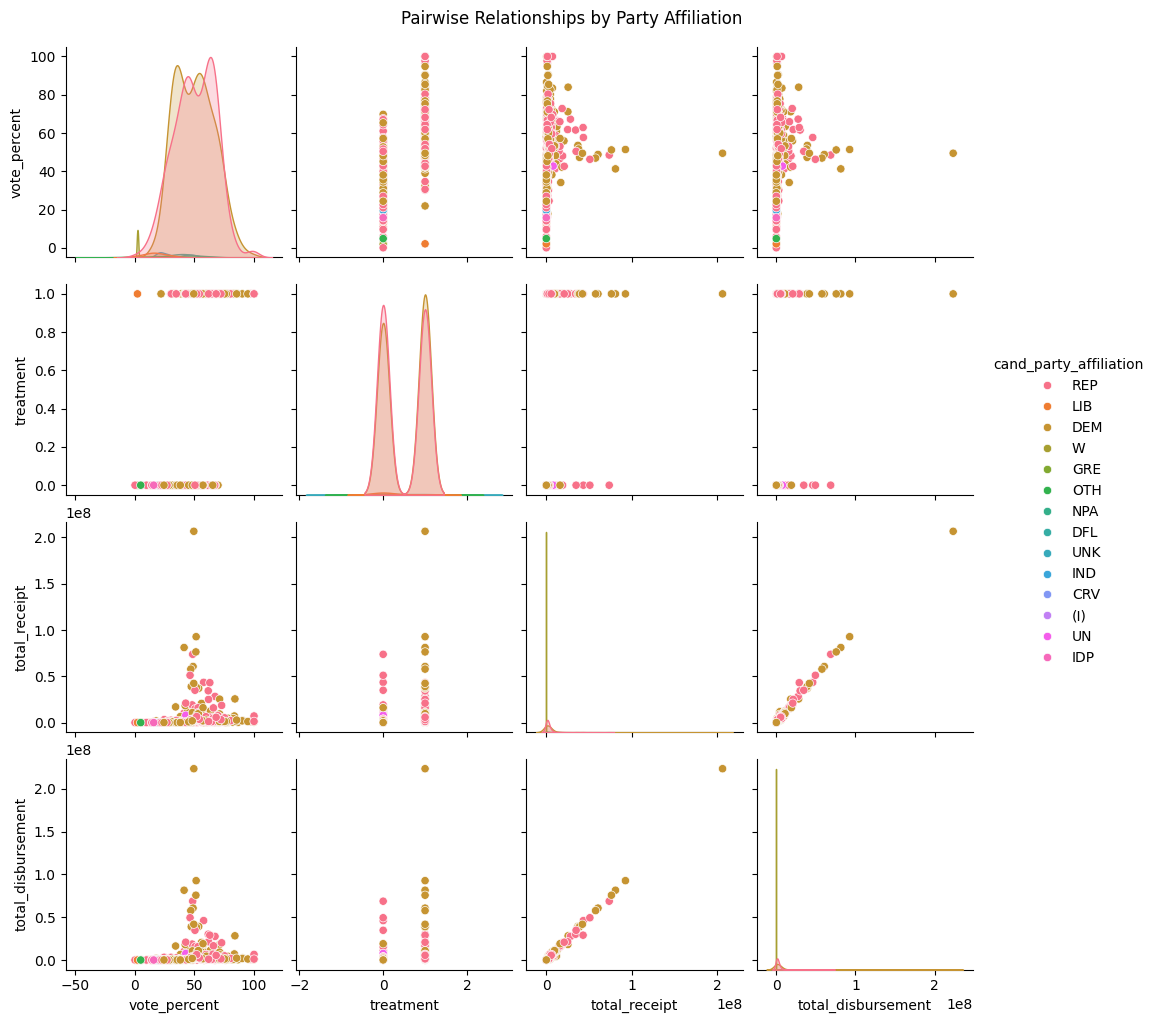

In [ ]:
cols_to_plot = ['vote_percent', 'treatment', 'total_receipt', 'total_disbursement','cand_party_affiliation']

pair_df = final_df[cols_to_plot].dropna()

sns.pairplot(pair_df, hue='cand_party_affiliation')

plt.suptitle("Pairwise Relationships by Party Affiliation", y=1.02)
plt.show()

Here we examine the same relationships but broken down by party. We can see that certain parties (REP or DEM mainly) tend to spend more and receive higher vote percentages, depending on the district. This supports the idea that party affiliation may also affect both treatment and outcome. Given the variety of parties in our dataset, the effects are more diffuse but still noticeable, especially in how treatment varies by party.

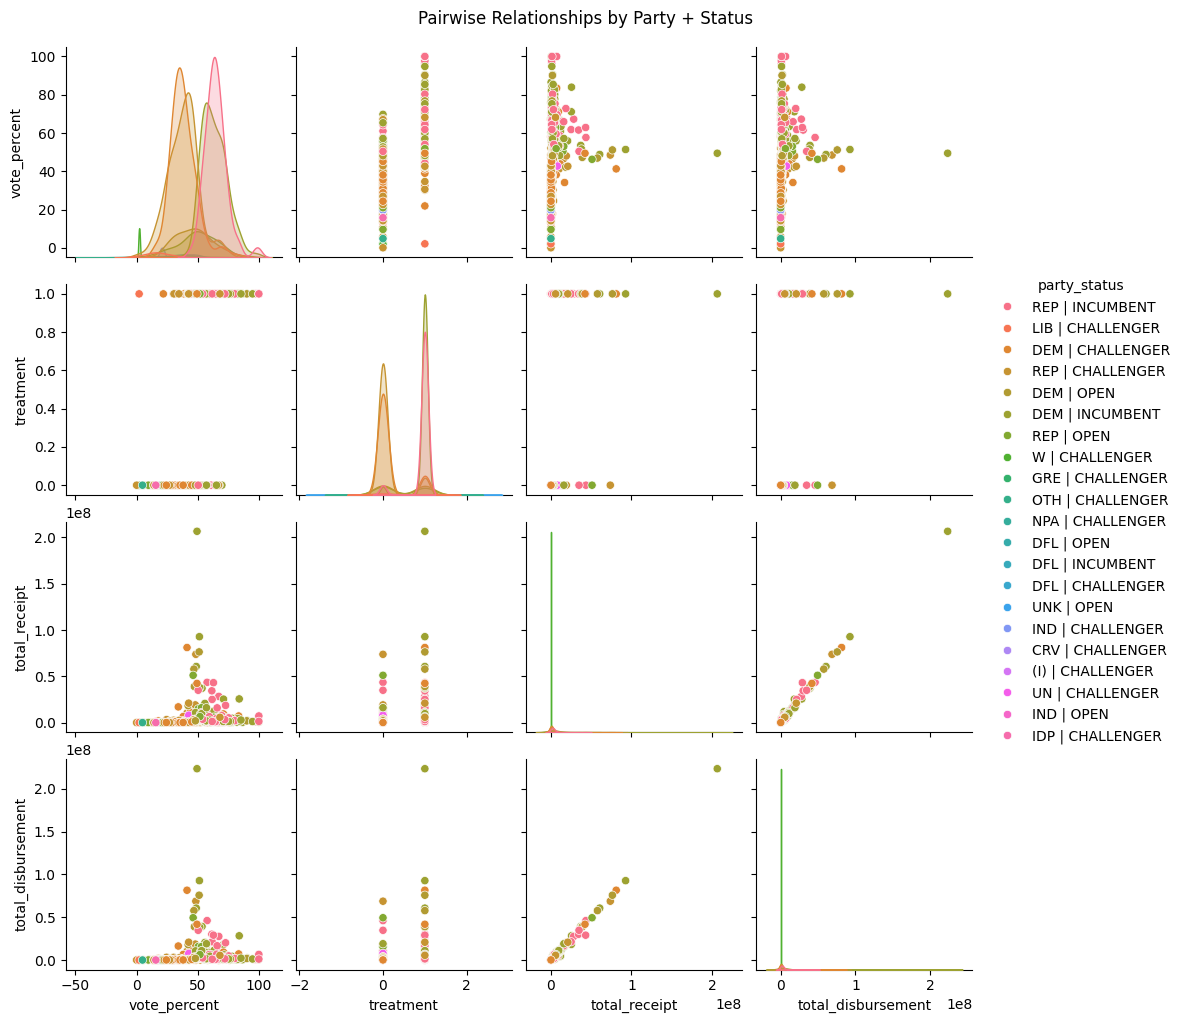

In [ ]:
cols_to_plot = ['vote_percent', 'treatment', 'total_receipt', 'total_disbursement','cand_party_affiliation', 'cand_incumbent_challenger_open_seat']

pair_df = final_df[cols_to_plot].dropna()

pair_df['party_status'] = (pair_df['cand_party_affiliation'] + ' | ' + pair_df['cand_incumbent_challenger_open_seat'])

sns.pairplot(pair_df, hue='party_status')
plt.suptitle("Pairwise Relationships by Party + Status", y=1.02)
plt.show()

Finally, we created a new variable that combines party and incumbency status (party_status) and used it to create a more granular view. This helps surface interactions between party and status. For instance, REP incumbents may behave differently from DEM challengers. The spread here reinforces what we saw before: both party and status matter in terms of spending and vote percentage, and we should adjust for both in our regression analysis.

# Simple Difference in Means (SDO)

In [ ]:
treated_mean = final_df[final_df['treatment'] == 1]['vote_percent'].mean()
control_mean = final_df[final_df['treatment'] == 0]['vote_percent'].mean()
sdo = treated_mean - control_mean

print(sdo)

26.22505714085044


This initial estimate shows that candidates who spent the most money in their race received, on average, 26.225% more of the vote than those who didn’t. However, this is a naive estimate that does not account for other variables that might affect both spending and vote share.

# Basic OLS Regression

In [ ]:
naive = final_df[['treatment', 'vote_percent']].dropna()

X = sm.add_constant(naive[['treatment']].astype(float))
y = naive['vote_percent'].astype(float)

model_basic = sm.OLS(y, X).fit()
print(model_basic.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_percent   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     1254.
Date:                Tue, 13 May 2025   Prob (F-statistic):          3.41e-172
Time:                        04:39:48   Log-Likelihood:                -3412.5
No. Observations:                 893   AIC:                             6829.
Df Residuals:                     891   BIC:                             6839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9731      0.527     68.285      0.0

Running a basic regression of vote percentage on our treatment variable, the coefficient on treatment is 26.2251, which lines up just about exactly with our earlier simple difference in means calculation. That suggests that, on average, the top-spending candidate in each race received 26.225% more of the vote than their competitors.

# OLS Regression (Controlling only Party)

In [ ]:
party = final_df[['vote_percent', 'treatment', 'cand_party_affiliation']].dropna()

X_party = pd.get_dummies(party[['treatment', 'cand_party_affiliation']], drop_first=True)
X_party = sm.add_constant(X_party.astype(float))
y_party = party['vote_percent'].astype(float)

model_party = sm.OLS(y_party, X_party).fit()
print(model_party.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_percent   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     102.0
Date:                Tue, 13 May 2025   Prob (F-statistic):          4.87e-173
Time:                        04:22:07   Log-Likelihood:                -3373.8
No. Observations:                 893   AIC:                             6778.
Df Residuals:                     878   BIC:                             6849.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Controlling only for party affiliation, we see that the coefficient on treatment is 25.62, with a very high t-statistic (35.54) and a p-value of 0.000, meaning the effect of treatment (spending the most in a race) is still highly statistically significant. However, the coefficient size has decreased slightly compared to the regression with no controls (from approximately 26.2 to approximately 25.6), suggesting that party affiliation may explain a small part of the variation in vote percentage.

The R-squared is 0.619, which is an improvement over the simple regression with no controls (which had R^2 equal to approximately 0.585), indicating that the model is explaining a bit more of the variation in vote share.

Still, the party variables themselves are mostly not statistically significant, with the exception of cand_party_affiliation_W. This suggests that party alone may not be the major confounder, or at least not the most informative control.

# OLS Regression (Controlling only Incumbency)

In [ ]:
incumbency = final_df[['vote_percent', 'treatment', 'cand_incumbent_challenger_open_seat']].dropna()

X_inc = pd.get_dummies(incumbency[['treatment', 'cand_incumbent_challenger_open_seat']], drop_first=True)
X_inc = sm.add_constant(X_inc.astype(float))
y_inc = incumbency['vote_percent'].astype(float)

model_inc = sm.OLS(y_inc, X_inc).fit()
print(model_inc.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_percent   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     519.7
Date:                Tue, 13 May 2025   Prob (F-statistic):          5.45e-195
Time:                        04:21:49   Log-Likelihood:                -3352.6
No. Observations:                 893   AIC:                             6713.
Df Residuals:                     889   BIC:                             6732.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Controlling only for incumbency status, the coefficient on treatment drops slightly again, to 16.82, and remains highly statistically significant.

Furthermore, the coefficients for incumbency status, both INCUMBENT and OPEN, are highly significant and have large magnitudes (approximately 13.04 and 4.89, respectively). The R-squared here is 0.637, higher than the party-only model, suggesting incumbency explains more of the variation in vote share than party does on its own.

# OLS Regression (Controlling for Party & Incumbency)

In [ ]:
both = final_df.dropna(subset=['vote_percent', 'treatment', 'cand_party_affiliation', 'cand_incumbent_challenger_open_seat'])

both = pd.get_dummies(
    both,
    columns=['cand_party_affiliation', 'cand_incumbent_challenger_open_seat'],
    drop_first=True
)

X = both[['treatment']]
X = X.join(both[[col for col in both.columns if col.startswith('cand_party_affiliation_') or col.startswith('cand_incumbent_challenger_open_seat_')]])
X = sm.add_constant(X.astype(float))
y = both['vote_percent'].astype(float)

model_both = sm.OLS(y, X).fit()
print(model_both.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_percent   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 13 May 2025   Prob (F-statistic):          1.72e-195
Time:                        04:40:37   Log-Likelihood:                -3315.8
No. Observations:                 893   AIC:                             6666.
Df Residuals:                     876   BIC:                             6747.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

This model adjusts for both potentially key confounders: party affiliation and incumbency status. Unlike the unadjusted/naive model, which initially suggested that candidates who spent the most received over 26 percentage points more of the vote, this regression finds a treatment effect of approximately 16.77 percentage points, still statistically significant, but still much smaller than the unadjusted estimate.

This drop suggests that a fair part of the correlation between spending and vote share is explained by party and incumbency factors that influence both how much a candidate spends and how many votes they get. For example, incumbents often spend more and also tend to win more votes.

Still, even after adjusting for these factors, the treatment coefficient remains large and highly significant. This strengthens the case for a potential causal effect of campaign spending on electoral outcomes.

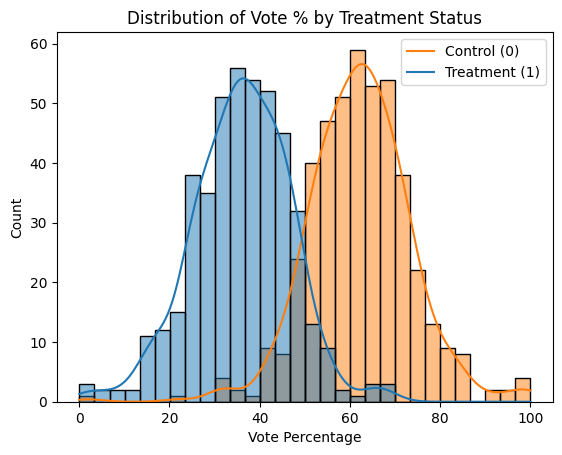

In [ ]:
sns.histplot(data=final_df, x='vote_percent', hue='treatment', kde=True, bins=30)
plt.title('Distribution of Vote % by Treatment Status')
plt.xlabel('Vote Percentage')
plt.ylabel('Count')
plt.legend(['Control (0)', 'Treatment (1)'])
plt.show()

# Checking for Potential Colliders

In [ ]:
cols_to_check = [col for col in final_df.columns if col not in ['treatment', 'vote_percent', 'race_id', 'candidate_name']]

for col in cols_to_check:
    df = final_df[['treatment', 'vote_percent', col]].dropna()

    # Convert categorical vars to codes
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

    try:
        X = sm.add_constant(df[['treatment', 'vote_percent']])
        y = df[col].astype(float)
        model = sm.OLS(y, X).fit()
        pvals = model.pvalues

        if (pvals['treatment'] < 0.05) and (pvals['vote_percent'] < 0.05):
            print(var, pvals['treatment'], pvals['vote_percent'])

    except:
        continue

cand_incumbent_challenger_open_seat 7.121216929026261e-15 1.0390923386995023e-06


To test for potential colliders, we checked whether any variables in the dataset were statistically predicted by both the treatment variable and the outcome variable.

Our check flagged cand_incumbent_challenger_open_seat as a potential collider because it is strongly associated with both spending and vote share. However, upon closer inspection, this result does not hold up conceptually, as incumbency status is not caused by either treatment or outcome. It is determined before the election even begins, based on whether a candidate already held the seat. Therefore, it is not a downstream effect of either who spent the most or how many votes were received. This confirms what we thought before; that incumbency itself is a confounder.

In [ ]:
final_df[['vote_percent', 'treatment', 'total_receipt', 'total_disbursement']].corr()

,vote_percent,treatment,total_receipt,total_disbursement
vote_percent,1.000000,0.764643,0.104084,0.091221
treatment,0.764643,1.000000,0.173639,0.162797
total_receipt,0.104084,0.173639,1.000000,0.995463
total_disbursement,0.091221,0.162797,0.995463,1.000000


In [ ]:
covariates = ['cand_incumbent_challenger_open_seat_INCUMBENT', 'cand_incumbent_challenger_open_seat_OPEN',]
both.groupby('treatment')[covariates].mean()

,cand_incumbent_challenger_open_seat_INCUMBENT,cand_incumbent_challenger_open_seat_OPEN
treatment,,
0,0.038549,0.122449
1,0.765487,0.108407


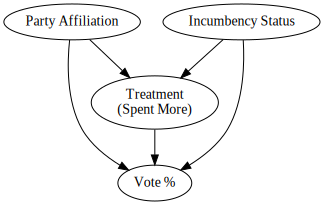

In [ ]:
from graphviz import Digraph

dag = Digraph(comment='Causal DAG: Campaign Spending and Vote %')

dag.node('T', 'Treatment\n(Spent More)')
dag.node('V', 'Vote %')
dag.node('P', 'Party Affiliation')
dag.node('I', 'Incumbency Status')

dag.edge('T', 'V')
dag.edge('P', 'T')
dag.edge('P', 'V')
dag.edge('I', 'T')
dag.edge('I', 'V')

dag.render('causal_dag', format='png', cleanup=False)
dag